
# Problem Statement 

### **Objective** : Create the Decision Tree classifier and visualize it graphically.

**Overview**: This Project deals with understanding the working of decision trees.The purpose of this project is if we feed any new data to this classifier, it would be able to predict the right class accordingly.  

**Context and Motivation** : A key challange for a Machine Learning Data Analyst is with data visualization make it easier to identify patterns, trends and outliers in large data sets.The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation. The key advantages of decision trees are simple to interpret and understand, requires little data preprocessing and able to hold both numerical and categorical data.

**Technical Stack :** scikit-learn, Numpy Array, Seaborn, Pandas, Matplotlib, Pydot











###  1.  Importing the necessary Libraries and Reading the Data



In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

Reading the Data (**csv file using read_csv() function**) and creating the dataframe using **pandas**

In [2]:
Iris_data=pd.read_csv('Iris.csv',index_col=0)
# Displaying the first five rows of the dataframe
Iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Verifying the Information of the dataframe
Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


Using **describe()** function calculating the various numerical descriptions of the data like count, mean, standard deviation, minimum and maximum values and percentile values.

In [4]:
Iris_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


### 2. Input Data Visualization

Using pairplot function from seaborn displaying a Pairplot for species(variable) in data to to map plot aspects to different colors.

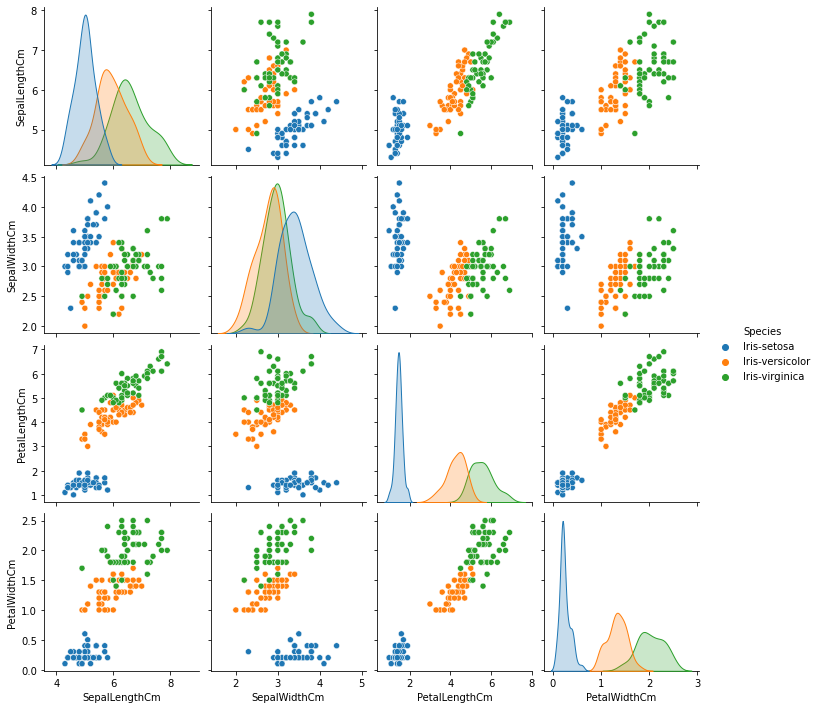

In [5]:
sns.pairplot(Iris_data, hue='Species')

Using corr() function in pandas displaying the pairwise correlation of all columns in the pandas dataframe i.e in our Iris dataframe.

In [6]:
Iris_data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Using heatmap() function in seaborn plotting rectangular data as a color-encoded matrix for corelation matrix.

<AxesSubplot:>

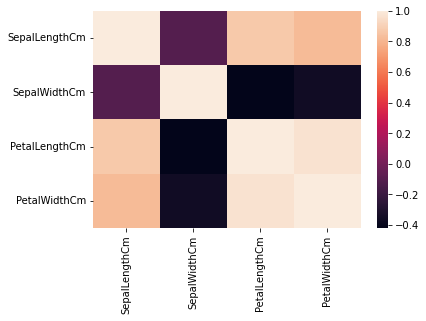

In [7]:
sns.heatmap(Iris_data.corr())

Creating a copy of dataframe to work further with the name **df**

In [8]:
df=Iris_data.copy()
df.shape

(150, 5)

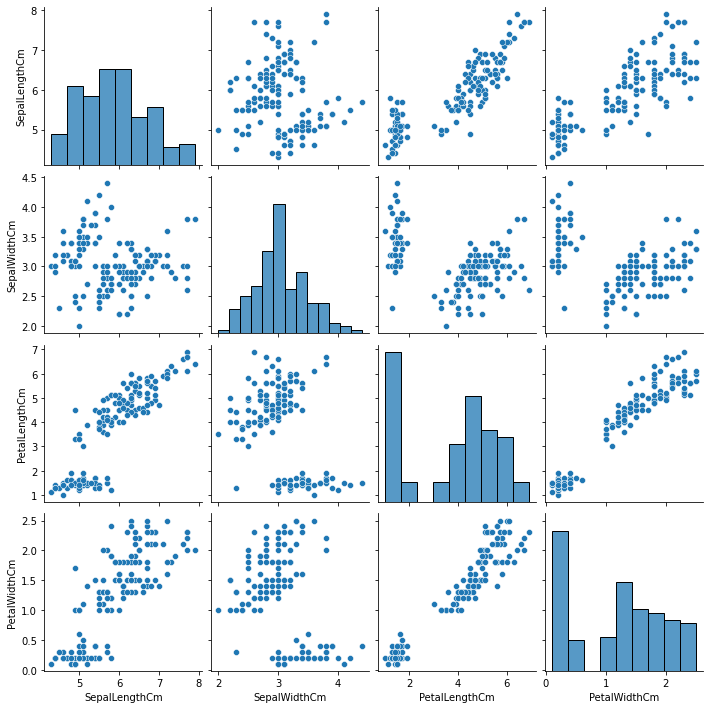

In [9]:
#Input data (DataFrame) Visualization 
sns.pairplot(df)

Applying colour to different plots of the result

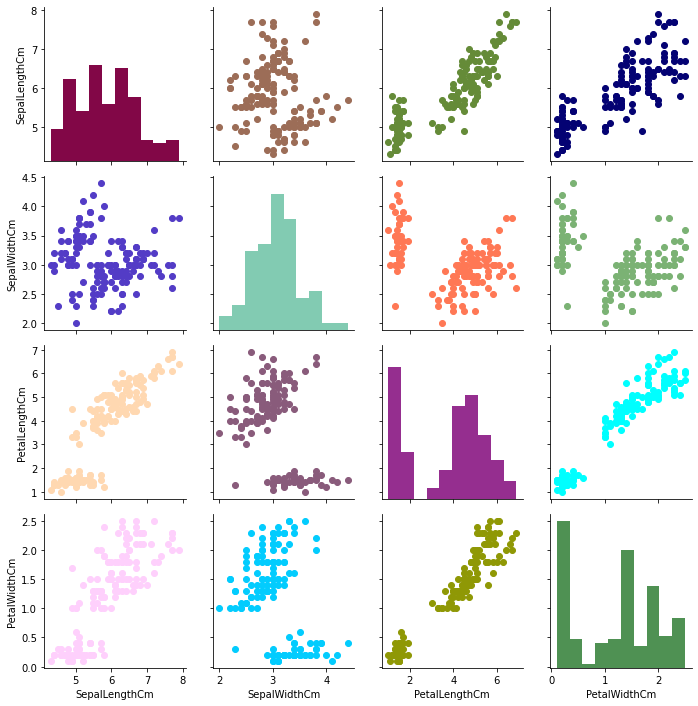

In [10]:
colors = iter(['xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple',
       'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green',
       'xkcd:purple blue', 'xkcd:baby shit green', 'xkcd:greyish blue'])

def my_scatter(x,y, **kwargs):
    kwargs['color'] = next(colors)
    plt.scatter(x,y, **kwargs)

def my_hist(x, **kwargs):
    kwargs['color'] = next(colors)
    plt.hist(x, **kwargs)

colourplot = sns.PairGrid(df)
colourplot.map_diag(my_hist)
colourplot.map_offdiag(my_scatter)

Using seaborn FaceGrid function which is used as Multi-plot grid for plotting conditional relationships plotting Sepallength vs sepalwidth and petallength vs petal width 

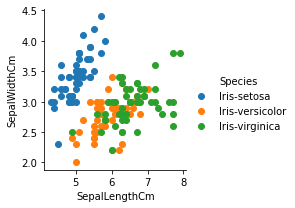

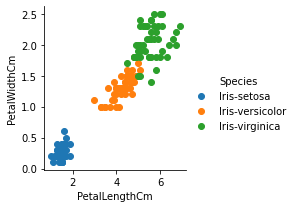

In [11]:
# Scatter plot of data based on Sepal Length and Width features
sns.FacetGrid(df,hue='Species').map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()
plt.show()

# Scatter plot of data based on Petal Length and Width features
sns.FacetGrid(df,hue='Species').map(plt.scatter,'PetalLengthCm','PetalWidthCm').add_legend()
plt.show()

### 3.Data preprocessing

Using **scipy.cluster.hierarchy** package we can cut hierarchical clusterings into flat clusterings.
So using this visualizing the hierarchy of our dataframe as dendogram using **dendogram()** function in the provided package

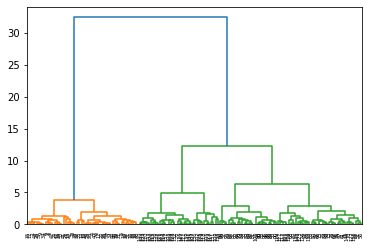

In [12]:
import scipy.cluster.hierarchy as sch
X = df.drop(columns='Species').values
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

Importing AgglomerativeClustering which recursively merges pair of clusters of sample data and then using fit_predict() we can fit and return the result of each sample’s clustering assignment.

In [13]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

Now plotting a scatterplot plotting the fitted clustering 

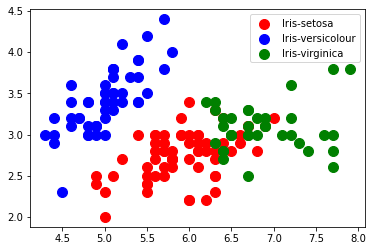

In [14]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.legend()

In [15]:
#Checking the unique items of the column Species
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
#Mapping the Species with the numbers or ids
species = {
    'Iris-setosa': 0,
    'Iris-versicolor':1,
    'Iris-virginica':2
}

In [17]:
df['Species'] = df['Species'].map(species)

In [18]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [19]:
X = df.iloc[:, :4].values
y = df.iloc[:, 4].values
X.shape, y.shape

((150, 4), (150,))

countplot() method is used to Show the counts of observations in each categorical bin using bars.

C:\Users\utkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


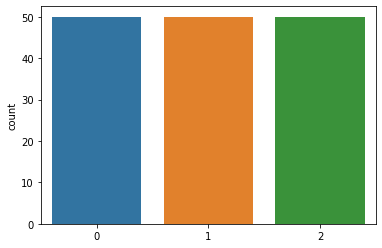

In [20]:
sns.countplot(y)
plt.show()

### 4.Trainig the model

The scikit-learn library provides us with the model_selection module in which we have the splitter function train_test_split(). The train_test_split() method is used to split our data into train and test sets. 


In [26]:
# Split X and y into training and test set in 70:30 ratio
# Sklearn package's randomized data splitting function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1) 
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)
print("Training Complete.")
y_pred = tree_classifier.predict(X_test)

Training Complete.


#### Classification Report and Confusion Matrix i.e Comparing the actual and predicted

In [27]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,2,2
5,1,1
6,2,2
7,0,0
8,0,0
9,2,2


#### Visualizing the Decision Tree

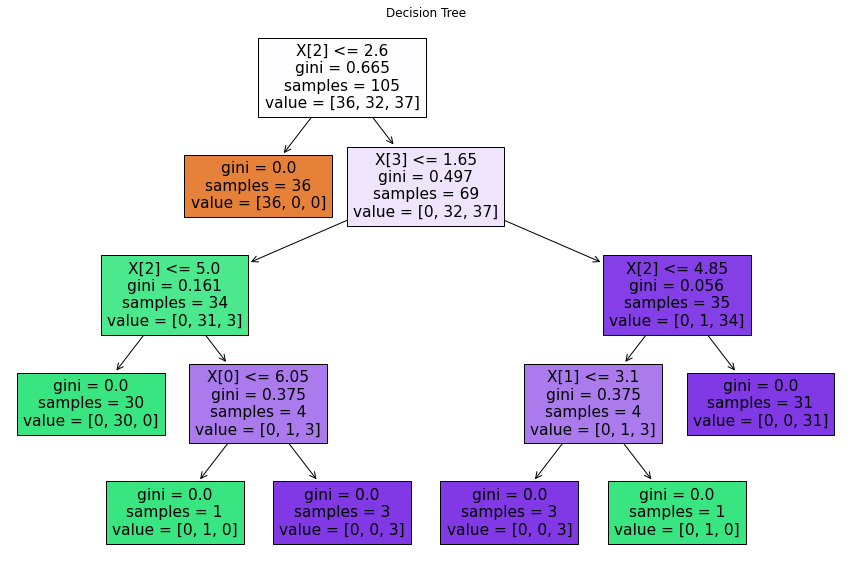

In [28]:
plt.figure(figsize = (15,10))
tree = plot_tree(tree_classifier, filled=True);
plt.title("Decision Tree")
plt.show()

The Scikit-Learn library contains functions that can help calculate mean absolute error, mean squared error, and root mean squared error values for us:

In [29]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.044444444444444446
Mean Squared Error: 0.044444444444444446
Root Mean Squared Error: 0.21081851067789195


In [32]:
print("Accuracy:","{0:.2f}".format(sm.accuracy_score(y_test, y_pred)*100),"%")

Accuracy: 95.56 %


**Conclusion**:
The accuracy by decision tree algorithm after splitting X and y into training and test set in 70:30 ratio is found to be **95.56% .